# Libraries 

In [1]:
# trio!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Import Train/Test Set

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
features_list = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']
target = 'stator_yoke'

In [4]:
X_train = df_train[features_list].to_numpy()
y_train = df_train[target].to_numpy()

In [5]:
X_train.shape, y_train.shape

((942653, 7), (942653,))

In [6]:
X_test = df_test[features_list].to_numpy()
y_test = df_test[target].to_numpy()

In [7]:
X_test.shape, y_test.shape

((55393, 7), (55393,))

# Data Preprocessing

In [8]:
X_scaler = MinMaxScaler()

In [9]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Predictive Models

## Linear Regression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8262629515726759

RMSE: 0.393554647082448


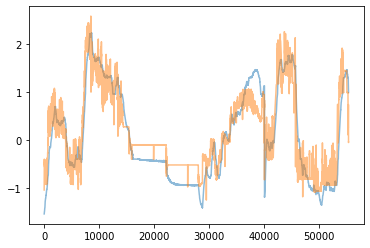

In [12]:
y_pred_lr = lr.predict(X_test)
plt.plot(y_test, alpha=0.5)
plt.plot(y_pred_lr, alpha=0.5)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f'RMSE: {rmse_lr}')

## Ridge

In [13]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.82625741248129

RMSE: 0.3935609206947844


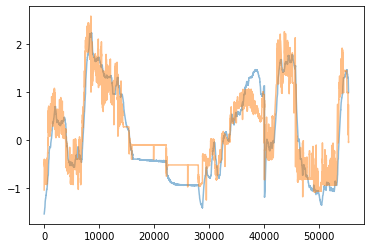

In [14]:
y_pred_ridge = ridge.predict(X_test_scaled)
plt.plot(y_test, alpha=0.5)
plt.plot(y_pred_ridge, alpha=0.5)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f'RMSE: {rmse_ridge}')

## Decision Tree Regressor

In [29]:
dt_reg = DecisionTreeRegressor(max_depth=7)
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.8190362861863328

RMSE: 0.40165629285665516


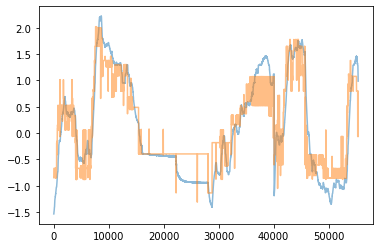

In [30]:
y_pred_dt_reg = dt_reg.predict(X_test)
plt.plot(y_test, alpha=0.5)
plt.plot(y_pred_dt_reg, alpha=0.5)
rmse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg, squared=False)
print(f'RMSE: {rmse_dt_reg}')

In [17]:
max_depth_range = range(2,11,2)
train_score = []
test_score = []
for depth in max_depth_range:
    dt_reg = DecisionTreeRegressor(max_depth=depth)
    dt_reg.fit(X_train, y_train)
    train_score.append(dt_reg.score(X_train, y_train))
    test_score.append(dt_reg.score(X_test, y_test))

Text(0, 0.5, 'Score')

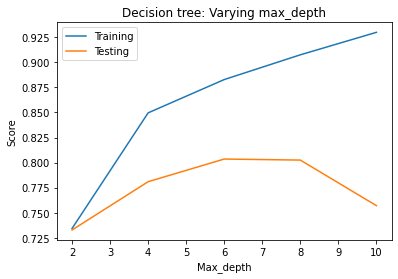

In [18]:
plt.title('Decision tree: Varying max_depth')
plt.plot(max_depth_range, train_score, label = 'Training')
plt.plot(max_depth_range, test_score, label = 'Testing')
plt.legend()
plt.xlabel('Max_depth')
plt.ylabel('Score')

## Random Forest Regressor 

In [19]:
rf_reg = RandomForestRegressor(n_estimators=20, max_depth=3)
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.784031301009817

RMSE: 0.4387874841366904


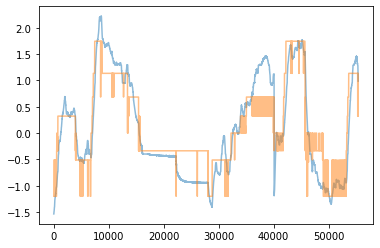

In [20]:
y_pred_rf_reg = rf_reg.predict(X_test)
plt.plot(y_test, alpha=0.5)
plt.plot(y_pred_rf_reg, alpha=0.5)
rmse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg, squared=False)
print(f'RMSE: {rmse_rf_reg}')

In [31]:
max_depth_range = range(2,11,2)
train_score = []
test_score = []
for depth in max_depth_range:
    rf_reg = RandomForestRegressor(n_estimators=20, max_depth=depth, n_jobs=-1)
    rf_reg.fit(X_train, y_train)
    train_score.append(rf_reg.score(X_train, y_train))
    test_score.append(rf_reg.score(X_test, y_test))

Text(0, 0.5, 'Score')

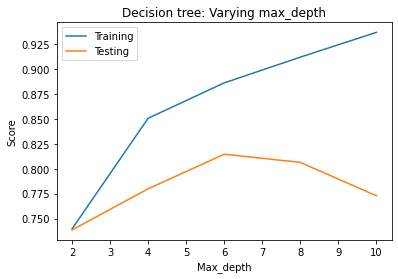

In [32]:
plt.title('Decision tree: Varying max_depth')
plt.plot(max_depth_range, train_score, label = 'Training')
plt.plot(max_depth_range, test_score, label = 'Testing')
plt.legend()
plt.xlabel('Max_depth')
plt.ylabel('Score')

In [33]:
n_range = range(20,221,40)
train_score = []
test_score = []
for n in n_range:
    rf_reg = RandomForestRegressor(n_estimators=n, max_depth=6, n_jobs=-1)
    rf_reg.fit(X_train, y_train)
    train_score.append(rf_reg.score(X_train, y_train))
    test_score.append(rf_reg.score(X_test, y_test))

Text(0, 0.5, 'Score')

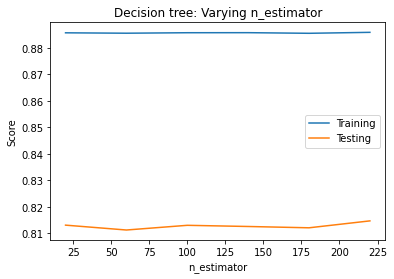

In [34]:
plt.title('Decision tree: Varying n_estimator')
plt.plot(n_range, train_score, label = 'Training')
plt.plot(n_range, test_score, label = 'Testing')
plt.legend()
plt.xlabel('n_estimator')
plt.ylabel('Score')

## Gradient Boosting modeling

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
gb = GradientBoostingRegressor(n_estimators=25,  max_depth=2, random_state=2)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.8012729755081341